In [1]:
import pandas as pd

cols = ["id", "city", "country", "IATA", "ICAO", "latitude", "longitude", "altitude", "timezone", "DST", "Tz database time zone", "type", "source"]
airports = pd.read_csv('data/airports.csv', index_col=0, names=cols, header=None)
print(airports.shape)
airports.head()

# Selecting columns
airport_country_continent = airports[['id','country']]
airport_country_continent.head()

continents = pd.read_csv('data/continents.csv')
## make a dictionary of country to continent
country_to_continent = {}
for index, row in continents.iterrows():
    country = row['Entity']
    country_to_continent[row['Entity']] = row['Continent']
    
## add a column to the airports dataframe
airport_country_continent['continent'] = airport_country_continent['country'].map(country_to_continent)
airport_country_continent.head()

## remove "-" from every row in the id column, use .loc to avoid the SettingWithCopyWarning
airport_country_continent.loc[:,'id'] = airport_country_continent['id'].str.replace('-', ' ')
# Make all the country names lowercase
airport_country_continent.loc[:,'id'] = airport_country_continent['id'].str.lower()
airport_country_continent.head()




(7698, 13)


C:\Users\Andba\AppData\Local\Temp\ipykernel_18660\1811848234.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
C:\Users\Andba\AppData\Local\Temp\ipykernel_18660\1811848234.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airport_country_continent['continent'] = airport_country_continent['country'].map(country_to_continent)


id           country continent
1                               goroka airport  Papua New Guinea   Oceania
2                               madang airport  Papua New Guinea   Oceania
3                 mount hagen kagamuga airport  Papua New Guinea   Oceania
4                               nadzab airport  Papua New Guinea   Oceania
5  port moresby jacksons international airport  Papua New Guinea   Oceania

In [32]:
continents = pd.read_csv('data/continents.csv')
print(continents.shape)
## make a dictionary of country to continent
country_to_continent = {}
for index, row in continents.iterrows():
    country = row['Entity']
    country_to_continent[row['Entity']] = row['Continent']
    
## show the first 5 entries of the dictionary
dict(list(country_to_continent.items())[0:5])

(285, 4)


{'Abkhazia': 'Asia',
 'Afghanistan': 'Asia',
 'Akrotiri and Dhekelia': 'Asia',
 'Aland Islands': 'Europe',
 'Albania': 'Europe'}

In [2]:
## Merge "airports" and "airportreviews" on "airport_name" and "airport_name"
reviews = pd.read_csv('data/airportreviews.csv')
reviews.head()



reviews.loc[:,'airport_name'] = reviews['airport_name'].str.replace('-', ' ')
reviews.loc[:,'airport_name'] = reviews['airport_name'].str.lower()


# There are many very similar but slightly different ways of naming the airports in the two dataframes. This is a problem. I want to match them even though they are not exactly the same. I will use the "fuzzywuzzy" library to do this. It is not installed by default, so I will install it first.

# !pip install fuzzywuzzy
# !pip install python-Levenshtein

from fuzzywuzzy import process
from tqdm import tqdm

# Use fuzzywuzzy process to get the best match for each airport name in the reviews dataframe, from the airport_country_continent dataframe, use tqdm to show progress
tqdm.pandas()
reviews['airport_name'] = reviews['airport_name'].progress_apply(lambda x: process.extractOne(x, airport_country_continent['id'])[0])

# save the reviews dataframe to a csv file
reviews.to_csv('data/airportreviews_cleaned.csv', index=False)

print(reviews.head())
print(reviews.shape)


# # check how many airport names from the reviews are in the airport_country_continent dataframe
# before = len(reviews)
# reviews = reviews.loc[reviews['airport_name'].isin(airport_country_continent['id'])]
# after = len(reviews)
# print(f'before and after: {before} and {after}')

# #airport_country_continent.head()

# # check if there are any NaNs in the "overall_rating" column
print(f"Amount of NaNs in overall rating :{reviews['overall_rating'].isnull().sum()}")


# # Merge "airports" and "airportreviews" on "id" and "airport_name"
# merged = pd.merge(airport_country_continent, reviews, left_on='id', right_on='airport_name')
# merged.head()

# # keep relevant columns
# cols = ['id', 'country', 'continent', 'content']
# merged = merged[cols]
# #merged.head()



  0%|          | 4/17721 [00:02<3:07:15,  1.58it/s]


KeyboardInterrupt: 

In [74]:
clean_reviews = pd.read_csv('data/airportreviews_cleaned.csv')
print(clean_reviews.head())
print(clean_reviews.shape)

      airport_name                              link  \
0  aalborg airport  /airport-reviews/aalborg-airport   
1  aalborg airport  /airport-reviews/aalborg-airport   
2  aalborg airport  /airport-reviews/aalborg-airport   
3  aalborg airport  /airport-reviews/aalborg-airport   
4  aalborg airport  /airport-reviews/aalborg-airport   

                             title           author author_country  \
0  Aalborg Airport customer review    Klaus Malling        Denmark   
1  Aalborg Airport customer review          S Kroes    Netherlands   
2  Aalborg Airport customer review       M Andersen        Denmark   
3  Aalborg Airport customer review  Paul Van Alsten         France   
4  Aalborg Airport customer review        K Fischer            NaN   

         date                                            content  \
0  2014-02-11  A small very effective airport with few flight...   
1  2013-02-13  This is a nice and modern airport at the momen...   
2  2012-08-07  A very nice airy termin

In [68]:
# check min and max of airportreviews "date_visit" column. Only look at the first 4 characters of the date, as the year is the only relevant part
reviews = pd.read_csv('data/airportreviews.csv')

print(reviews['date'].str[:4].min())
print(reviews['date'].str[:4].max())

# first date is 2002 and last date is 2015.



2002
2015


In [34]:
countries_from_airports = airports['country'].unique()
countries_from_continents = continents['Entity'].unique()
## find the countries that are in airports but not in continents
for country in countries_from_airports:
    if country not in countries_from_continents:
        print(country)
        
def fix_country_name(name : str) -> str:
    """
    Function for matching up the country names in the airports dataset with the country names in the continents dataset.
    """
    
    if name[:5] == "Congo":
        return "Congo"
    
    if name == "Czech Republic":
        return "Czechia"
    
    if name == "Macedonia":
        return "North Macedonia"
    
    if name == "Swaziland":
        return "Eswatini"
    
    if name == "Micronesia":
        return "Micronesia (country)"
    
    if name == "Burma":
        return "Myanmar"
    
    if name in ["Midway Islands", "Virgin Islands", "Johnston Atoll", "Wake Island"]:
        return "United States"
    
    if name == "Macau":
        return "China"
    
    if name == "Cocos (Keeling) Islands":
        return "Australia"
    
    return name

## apply the function to the country column

merged.loc[:,'country'] = merged['country'].apply(fix_country_name)
merged.head()

Congo (Brazzaville)
Congo (Kinshasa)
Swaziland
Czech Republic
Macedonia
West Bank
Midway Islands
Micronesia
Virgin Islands
Macau
Burma
Johnston Atoll
Cocos (Keeling) Islands
Svalbard
Wake Island


id country      continent  \
0  prince rupert airport  Canada  North America   
1           faro airport  Canada  North America   
2           faro airport  Canada  North America   
3           faro airport  Canada  North America   
4           faro airport  Canada  North America   

                                             content  
0  This is a very small airport on an island. You...  
1  Arrivals at Faro are not too bad, queues at pa...  
2  Airport lounge at Faro was terrible 1 choice o...  
3  Just awful. Incredibly rude staff on the secur...  
4  The most awful airport I have ever had to use....

In [35]:
# group the merged dataframe by continent and count the number of reviews
grouped = merged.groupby('continent').count()
grouped

# make each continent a "community" and group all the reviews from the same continent into the same community
communities = {}
for index, row in merged.iterrows():
    if row['continent'] not in communities:
        communities[row['continent']] = []
    communities[row['continent']].append(row['content'])

# print the first 5 reviews from each community
for key in communities:
    print(f'{key}: {communities[key][:5]}')
    print('\n\n')


""" OBS der er en NaN kategori i 'continent' kolonnen """



North America: ['This is a very small airport on an island. You have to get a ferry and a bus to reach it both free of charge. It is in a lovely setting surrounded by trees. The facilities are very limited with only one very small cafe no shops but that is all part of the charm.', 'Arrivals at Faro are not too bad, queues at passport control manageable and baggage reclaim relatively quick. Obviously, as a holiday airport there are people milling around in arrivals looking for car rental and transfers but it all seems to work ok. Departing from Faro is a different story. Expect long, slow check in lines and repeat the experience at security. There\'s never any sign of anyone organising or controlling the system. Goodness knows what it\'s like in July and August. On my last visit, the Gents toilets stank, most of the soap dispensers at the sinks were empty, there were no paper towels to dry your hands and the hot air dryers didn\'t work. Food and drink (such as is available) is poor and 

" OBS der er en NaN kategori i 'continent' kolonnen "

  0%|          | 0/122 [00:00<?, ?it/s]

100%|██████████| 9/9 [00:00<00:00, 818.81it/s]


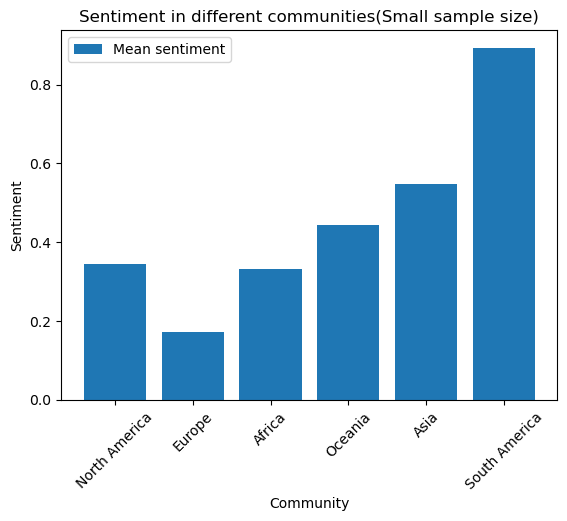

In [36]:
# apply vader sentiment analysis to each key in the communities dictionary, on NON-stemmed/tokenized data.
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

analyzer = SentimentIntensityAnalyzer()

keys = ["North America", "Europe", "Africa","Oceania", "Asia", "South America"]

sentiments = {}
for key in keys:
    sentiments[key] = []
    for review in tqdm(communities[key]):
        sentiment = analyzer.polarity_scores(review)
        sentiments[key].append(sentiment['compound'])



# plot the sentiments in the different communities
plt.bar(sentiments.keys(), [np.mean(sentiments[key]) for key in sentiments.keys()])
plt.ylabel('Sentiment')
plt.xlabel('Community')
plt.xticks(rotation=45)
plt.title('Sentiment in different communities(Small sample size)')
plt.legend(['Mean sentiment'])
plt.show()





In [37]:
import re
import nltk

def lexical_diversity(text):
    return len(set(text)) / len(text)

def percentage(count, total):
    return 100 * count / total

def tokenize(text):
    tokens = nltk.word_tokenize(text)
    tokens = [token for token in tokens if token.isalpha()]
    tokens = [token.lower() for token in tokens]
    stopwords = set(nltk.corpus.stopwords.words('english'))
    tokens = [token for token in tokens if token not in stopwords]
    tokens = [stem(token) for token in tokens]
    return tokens


def stem(word):
     regexp = r'^(.*?)(ing|ly|ed|ious|ies|ive|es|s|ment)?$'
     stem, suffix = re.findall(regexp, word)[0]
     return stem

In [38]:
# tokenize each community in the communities dictionary
from tqdm import tqdm
tokenized_communities = {}
for key in tqdm(communities):
    tokenized_communities[key] = []
    for review in communities[key]:
        tokenized_communities[key].extend(tokenize(review))


100%|██████████| 7/7 [00:05<00:00,  1.28it/s]


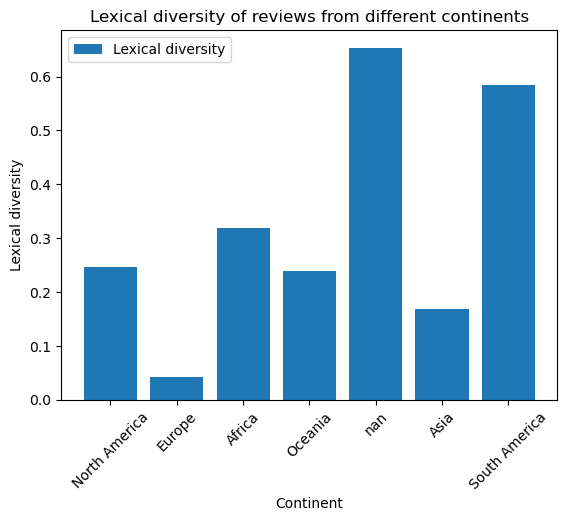

In [39]:
import matplotlib.pyplot as plt
# calculate the lexical diversity of each community
lexical_diversities = {}
for key in tokenized_communities:
    lexical_diversities[key] = lexical_diversity(tokenized_communities[key])

lexical_diversities

# plot the lexical diversity of each community
plt.bar(range(len(lexical_diversities)), list(lexical_diversities.values()), align='center')
plt.xticks(range(len(lexical_diversities)), list(lexical_diversities.keys()), rotation=45)
plt.title('Lexical diversity of reviews from different continents')
plt.ylabel('Lexical diversity')
plt.xlabel('Continent')
plt.legend(['Lexical diversity'])
plt.show()



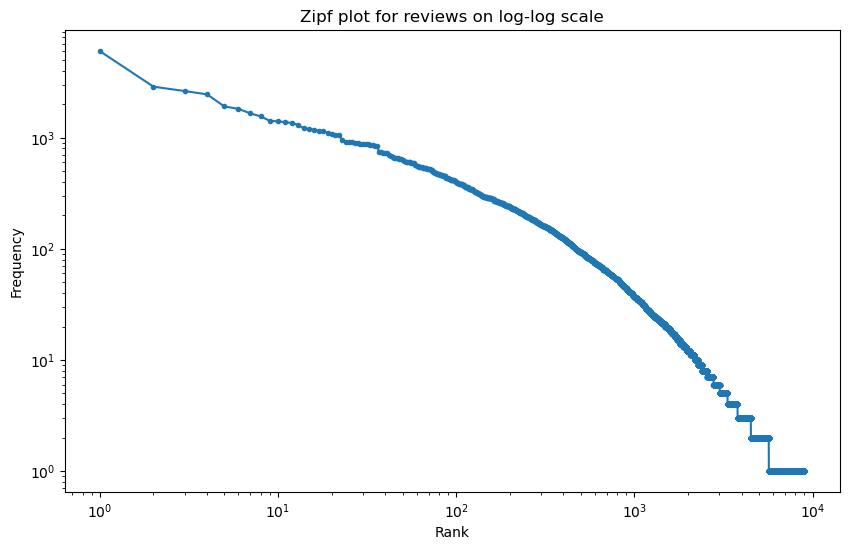

In [40]:
# big community, all communities merged into one
from collections import Counter
big_community = []
for key in tokenized_communities:
    big_community.extend(tokenized_communities[key])

word_count = Counter(big_community)
word_count.most_common(10)

# zipf plot on log log scale
import numpy as np
plt.figure(figsize=(10, 6))
ranks = np.arange(1, len(word_count) + 1)
freqs = [f for w, f in word_count.most_common()]
plt.loglog(ranks, freqs, marker=".")
plt.title("Zipf plot for reviews on log-log scale")
plt.ylabel("Frequency")
plt.xlabel("Rank")
plt.show()



In [41]:
# Define functions


def top_n_terms(list_of_tokens, n):
    """
    Find the top n most common tokens in a list of tokens
    """
    counter = Counter(list_of_tokens)
    return counter.most_common(n)

def term_frequency(term, token_list):
    return token_list.count(term) / len(token_list)

def inverse_document_frequency(term, token_lists):
    num_docs_with_term = sum(1 for tokens in token_lists if term in tokens)
    return np.log( len(token_lists) / num_docs_with_term )

def tf_idf(term, token_list, token_lists):
    return term_frequency(term, token_list) * inverse_document_frequency(term, token_lists)


In [42]:
# For each community, calculate the TF, IDF, and TF-IDF of the top 10 words.

top_words = {}
for key in tqdm(tokenized_communities):
    top_words[key] = {}
    for word, freq in word_count.most_common(10):
        tf = term_frequency(word, tokenized_communities[key])
        idf = inverse_document_frequency(word, tokenized_communities.values())
        tfidf = tf_idf(word, tokenized_communities[key], tokenized_communities.values())
        top_words[key][word] = {'TF': tf, 'IDF': idf, 'TF-IDF': tfidf}

""" This is not very interesting since everyone is describing the same thing, an airport. """


100%|██████████| 7/7 [00:00<00:00, 29.42it/s]


' This is not very interesting since everyone is describing the same thing, an airport. '

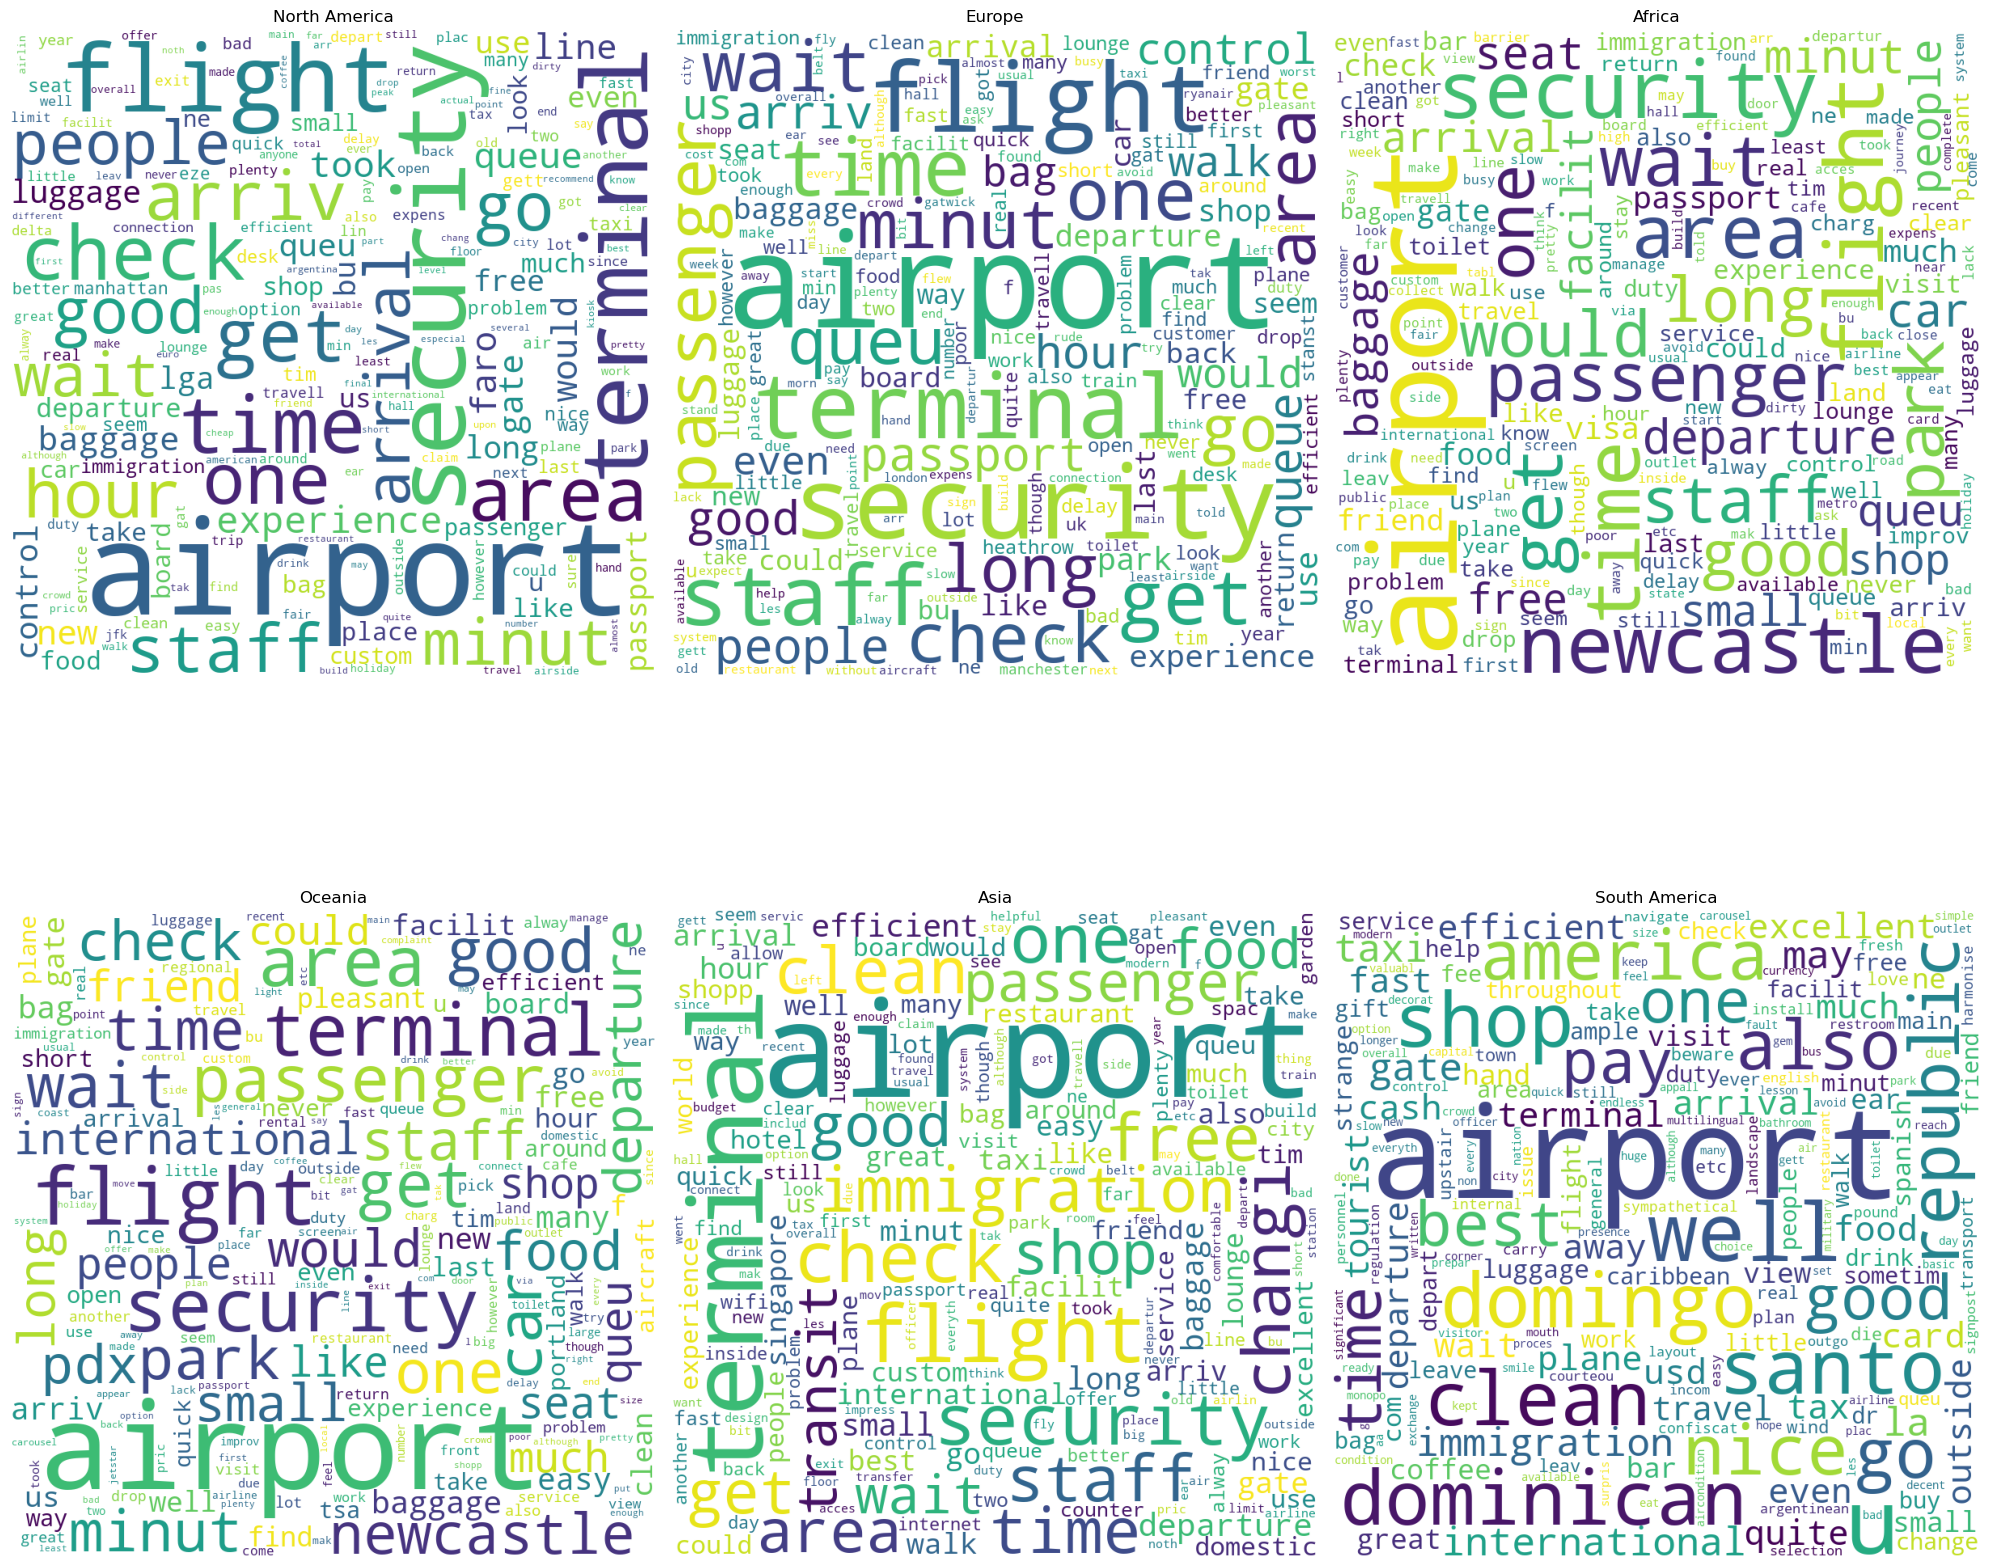

In [43]:
from wordcloud import WordCloud

# remove the 5th key from tokenized_communities
plot_keys = ['North America', 'Europe', 'Africa', 'Oceania', 'Asia','South America']

plot_communities = {key: tokenized_communities[key] for key in plot_keys}

fig, axs = plt.subplots(2, 3, figsize=(20, 20)) 
for i, community in enumerate(plot_communities):
    ax = axs[i // 3, i % 3]
    word_freq = top_n_terms(plot_communities[community],len(plot_communities[community]))
    wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(dict(word_freq))
    ax.imshow(wordcloud)
    ax.axis("off")

    ax.set_title(community)


plt.tight_layout()
plt.show()


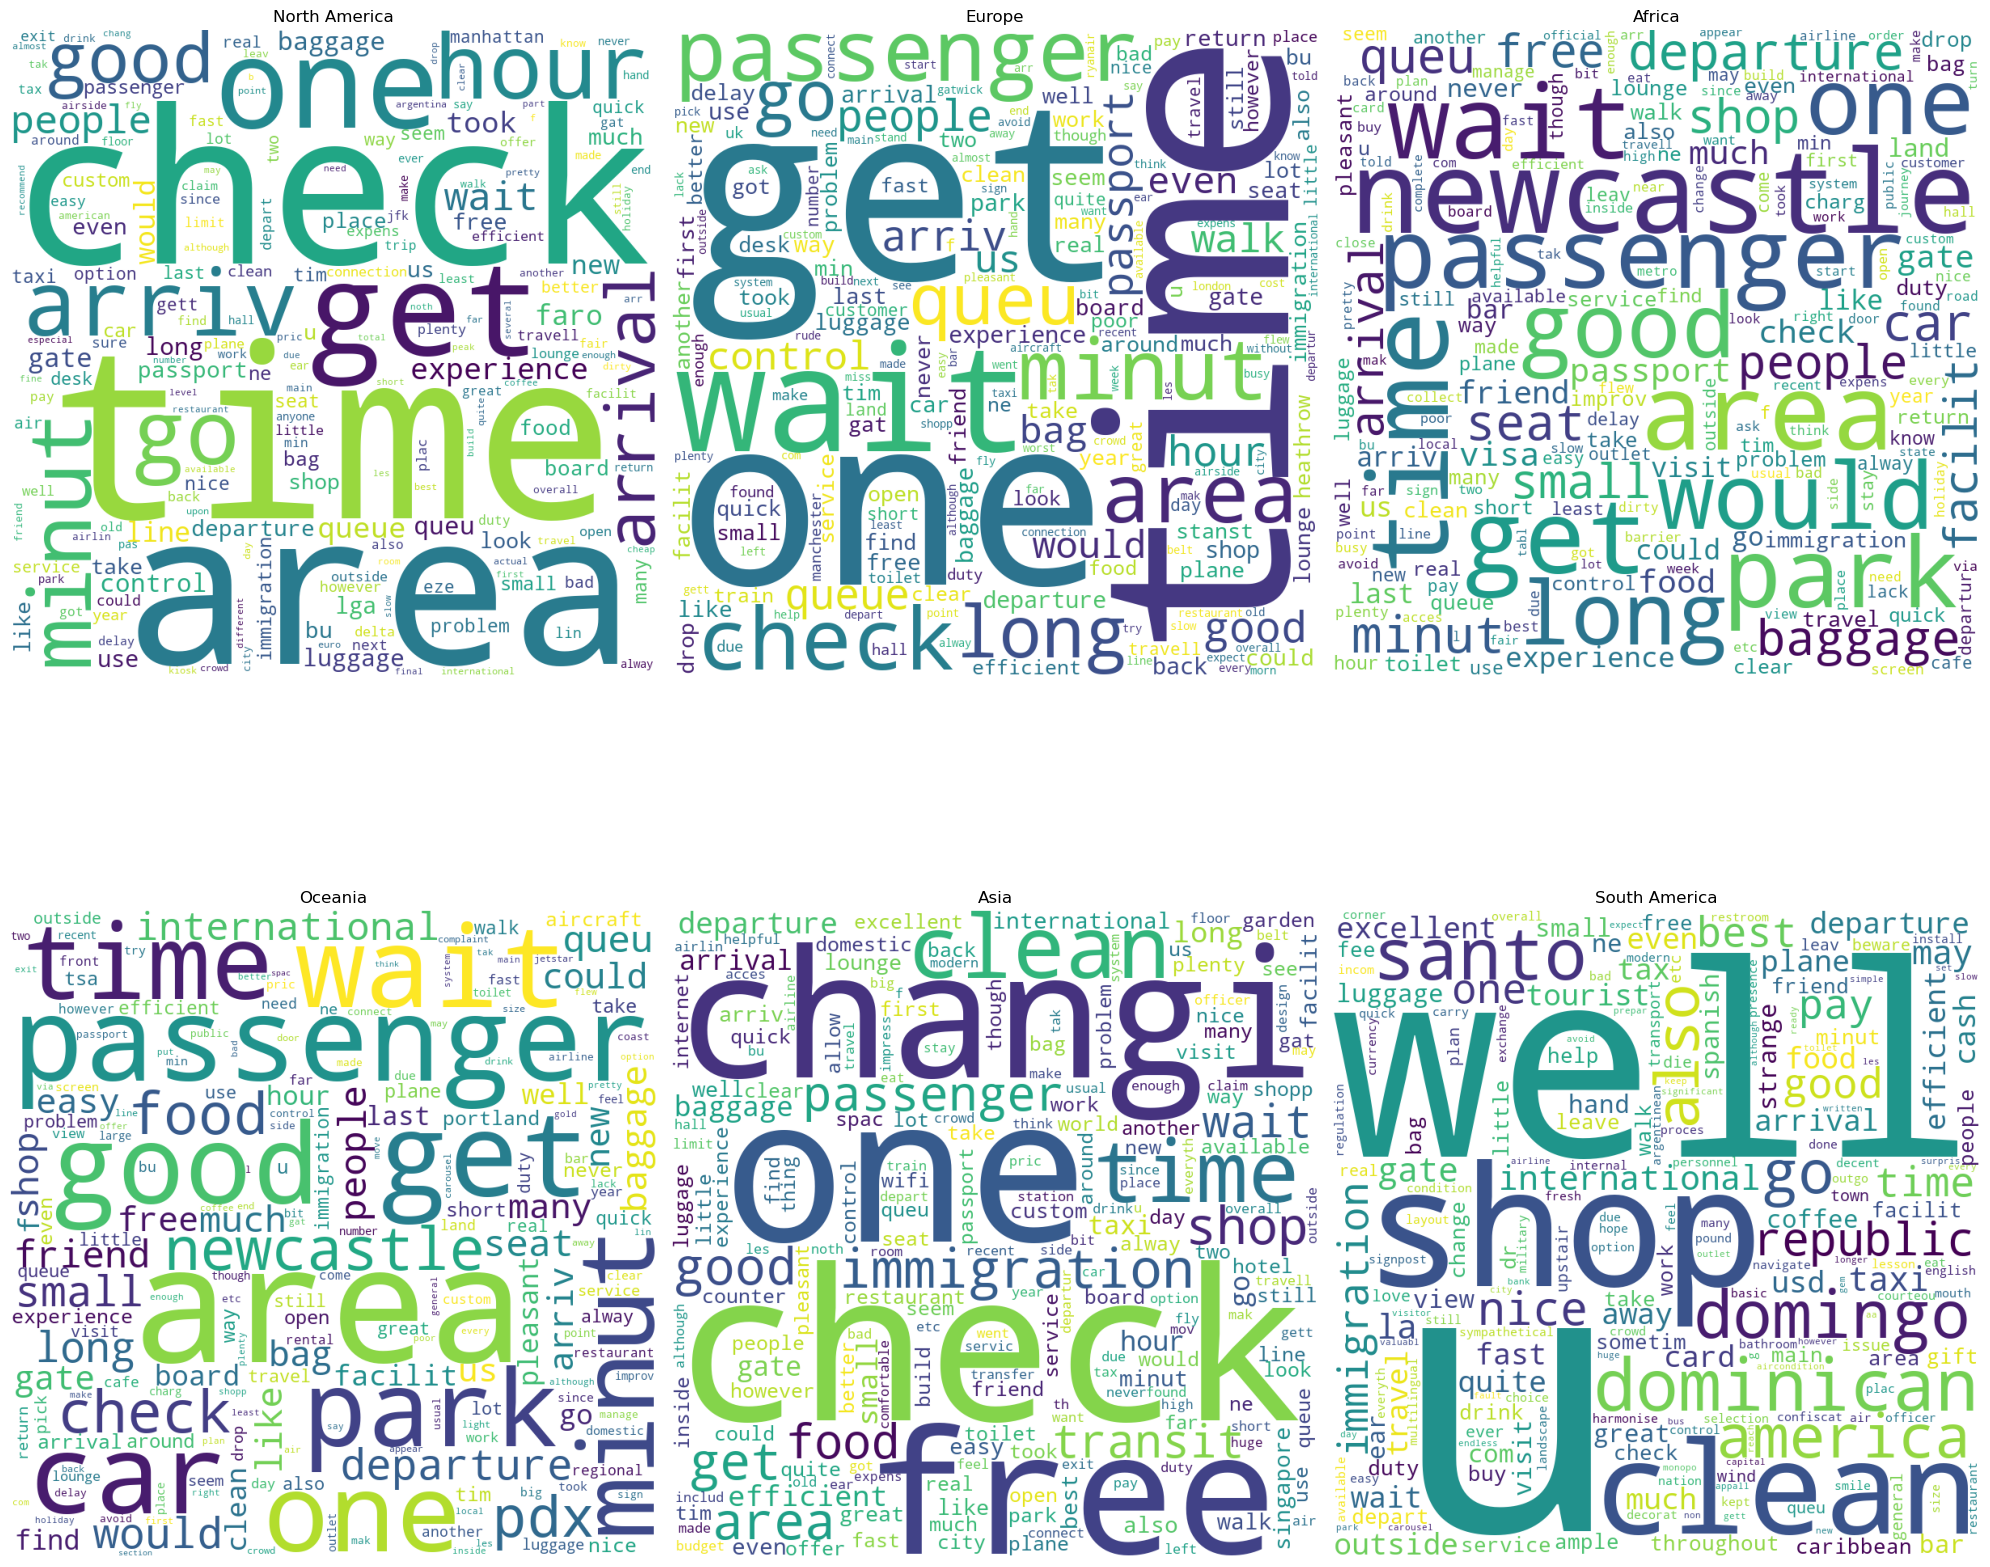

In [44]:
# Remove the top 5 most common words from each community and plot the word clouds again.
# We do this because the most common words often are words such as "airport" and "flight" which are not very interesting.

for key in plot_communities:
    top_words = [word for word, freq in word_count.most_common(5)]
    plot_communities[key] = [word for word in plot_communities[key] if word not in top_words]

# plot the word clouds again
fig, axs = plt.subplots(2, 3, figsize=(20, 20))
for i, community in enumerate(plot_communities):
    ax = axs[i // 3, i % 3]
    word_freq = top_n_terms(plot_communities[community], len(plot_communities[community]))
    wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(dict(word_freq))
    ax.imshow(wordcloud)
    ax.axis("off")
    ax.set_title(community)

plt.tight_layout()
plt.show()


In [45]:
# get number of reviews in each community
num_reviews = {key: len(communities[key]) for key in communities}
num_reviews

{'North America': 122,
 'Europe': 3333,
 'Africa': 95,
 'Oceania': 172,
 nan: 5,
 'Asia': 309,
 'South America': 9}

  0%|          | 0/6 [00:00<?, ?it/s]

100%|██████████| 6/6 [00:05<00:00,  1.12it/s]


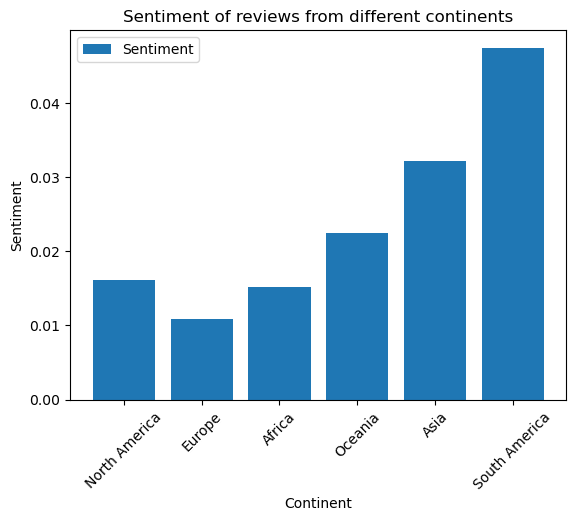

In [46]:
# Using bag of words to represent the reviews we can use vader to calculate the sentiment of each review

from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

sentiments = {}
for key in tqdm(plot_communities):
    sentiments[key] = []
    for review in plot_communities[key]:
        sentiments[key].append(sid.polarity_scores(review)['compound'])


# plot the sentiment of each community
plt.bar(range(len(sentiments)), [np.mean(sentiments[key]) for key in sentiments], align='center')
plt.xticks(range(len(sentiments)), list(sentiments.keys()), rotation=45)
plt.title('Sentiment of reviews from different continents')
plt.ylabel('Sentiment')
plt.xlabel('Continent')
plt.legend(['Sentiment'])
plt.show()
